In [21]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from xgboost import XGBRegressor

Reading the CSVs for results of sentimental analysis and tweet filtering

In [22]:
amazon = pd.read_csv('dataset/Sentiment_amazon_tweets2.csv')
tesla = pd.read_csv('dataset/Sentiment_tesla_tweets2.csv')
microsoft= pd.read_csv('dataset/Sentiment_microsoft_tweets2.csv')
google= pd.read_csv('dataset/Sentiment_google_tweets2.csv')
apple = pd.read_csv('dataset/Sentiment_apple_tweets2.csv')

Dropping columns which are not required for ML modeling

In [23]:
def drop_columns(df):
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    df = df.drop(columns=['tweet_id','writer','body','comment_num','retweet_num','like_num','ticker_symbol','tidy_tweet'],axis=1)
    return df
    

In [24]:
tesla = drop_columns(tesla)
amazon = drop_columns(amazon)
microsoft = drop_columns(microsoft)
apple = drop_columns(apple)
google = drop_columns(google)

Using XGBRegressor to predict Tesla stock prices

In [25]:
tesla_x = tesla.iloc[:, 1:5].values
tesla_y = tesla.iloc[:, 5].values

x_train, x_test, y_train, y_test = train_test_split(tesla_x, tesla_y, test_size=0.180,  shuffle= False)


pipeline = make_pipeline(StandardScaler(), XGBRegressor(alpha=1.0))
pipeline.fit(x_train, y_train)

predict = pipeline.predict(x_test)

In [26]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {pipeline.score(x_train, y_train) * 100:.2f}% and Test Score : {pipeline.score(x_test, y_test) * 100:.2f}% using xgboost Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 3.1331
Mean Squared Error: 18.6873
Root Mean Squared Error: 4.3229
(R^2) Score: -6.1146
Train Score : 99.20% and Test Score : -611.46% using xgboost Regressor.
Accuracy: 96.49 %.


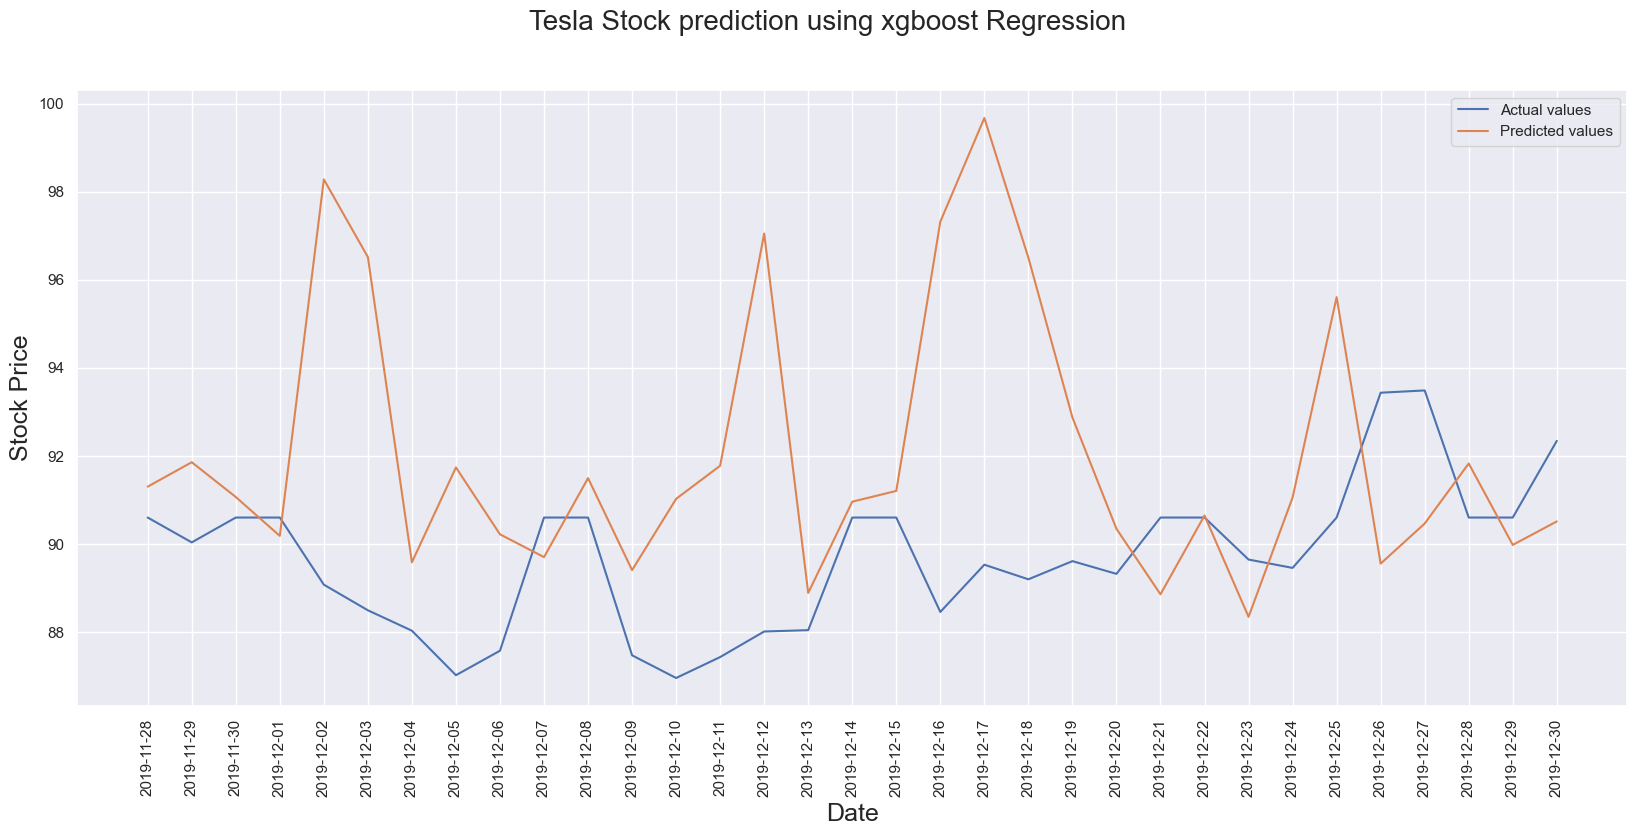

In [27]:
plt.figure(figsize=(20, 8))
plt.plot(tesla['Date'].tail(33), y_test, label = "Actual values")
plt.plot(tesla['Date'].tail(33), predict, label = "Predicted values")
plt.suptitle('Tesla Stock prediction using xgboost Regression', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Stock Price', fontsize=18)
plt.xticks(rotation = 90)
plt.legend()
plt.show()

Using XGBRegressor to predict Amazon stock prices

In [28]:
amazon_x = amazon.iloc[:, 1:5].values
amazon_y = amazon.iloc[:, 5].values

x_train, x_test, y_train, y_test = train_test_split(amazon_x, amazon_y, test_size=0.180,  shuffle= False)


pipeline = make_pipeline(StandardScaler(), XGBRegressor(alpha=1.0))
pipeline.fit(x_train, y_train)

predict = pipeline.predict(x_test)

In [29]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {pipeline.score(x_train, y_train) * 100:.2f}% and Test Score : {pipeline.score(x_test, y_test) * 100:.2f}% using xgboost Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 4.4673
Mean Squared Error: 32.9497
Root Mean Squared Error: 5.7402
(R^2) Score: -1.5512
Train Score : 96.86% and Test Score : -155.12% using xgboost Regressor.
Accuracy: 82.0 %.


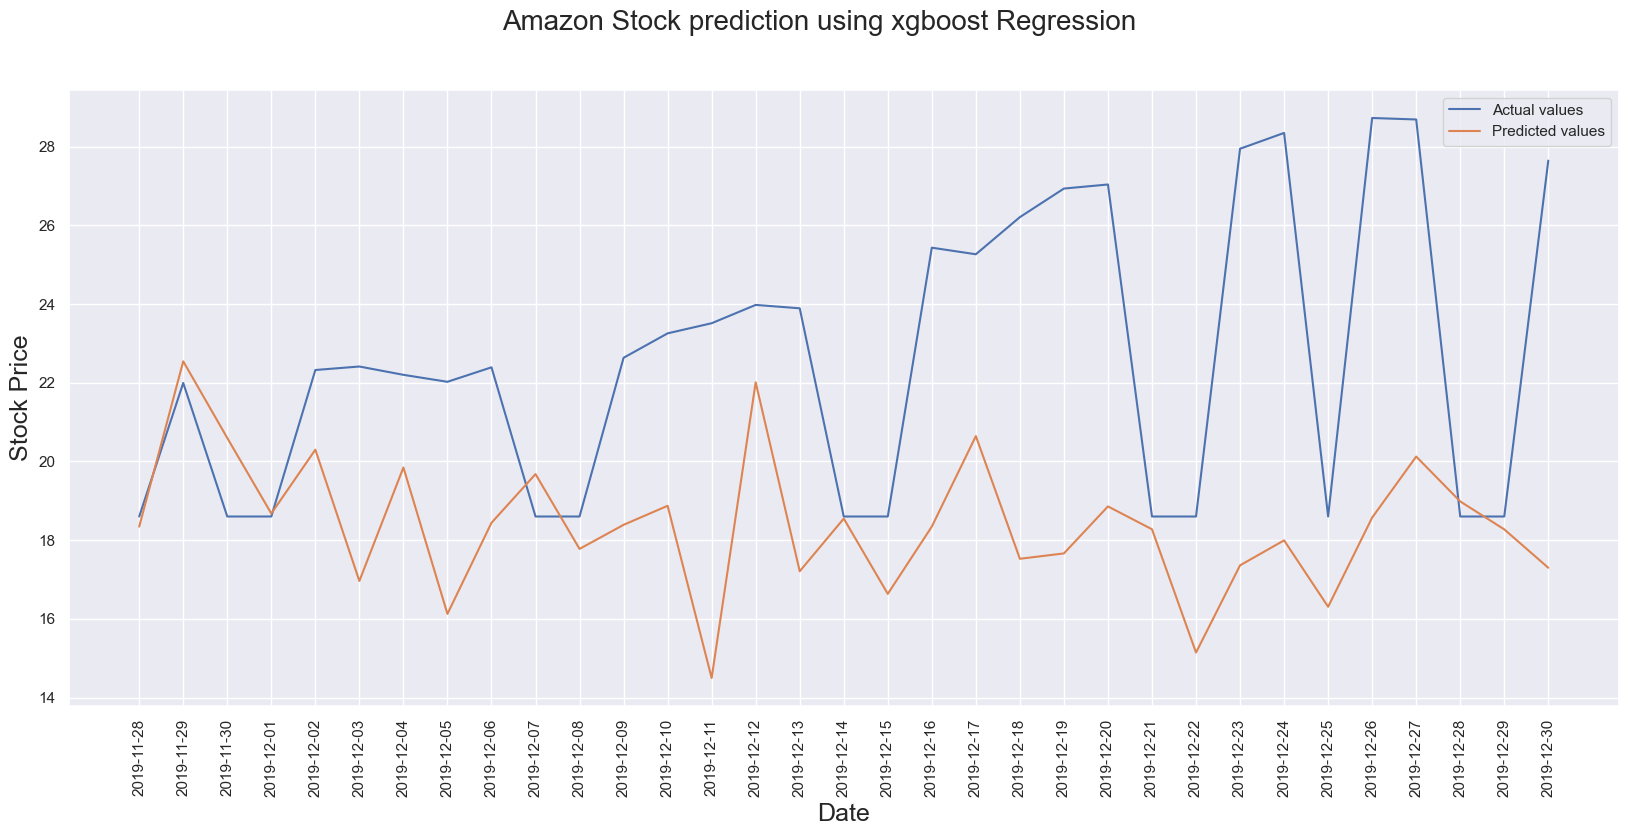

In [30]:
plt.figure(figsize=(20, 8))
plt.plot(tesla['Date'].tail(33), y_test, label = "Actual values")
plt.plot(tesla['Date'].tail(33), predict, label = "Predicted values")
plt.suptitle('Amazon Stock prediction using xgboost Regression', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Stock Price', fontsize=18)
plt.xticks(rotation = 90)
plt.legend()
plt.show()

Using XGBRegressor  to predict Apple stock prices

In [31]:
apple_x = apple.iloc[:, 1:5].values
apple_y = apple.iloc[:, 5].values

x_train, x_test, y_train, y_test = train_test_split(apple_x, apple_y, test_size=0.180,  shuffle= False)


pipeline = make_pipeline(StandardScaler(), XGBRegressor(alpha=1.0))
pipeline.fit(x_train, y_train)

predict = pipeline.predict(x_test)

In [32]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {pipeline.score(x_train, y_train) * 100:.2f}% and Test Score : {pipeline.score(x_test, y_test) * 100:.2f}% using Xgboost Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 8.8616
Mean Squared Error: 119.1743
Root Mean Squared Error: 10.9167
(R^2) Score: -3.0216
Train Score : 92.83% and Test Score : -302.16% using Xgboost Regressor.
Accuracy: 87.02 %.


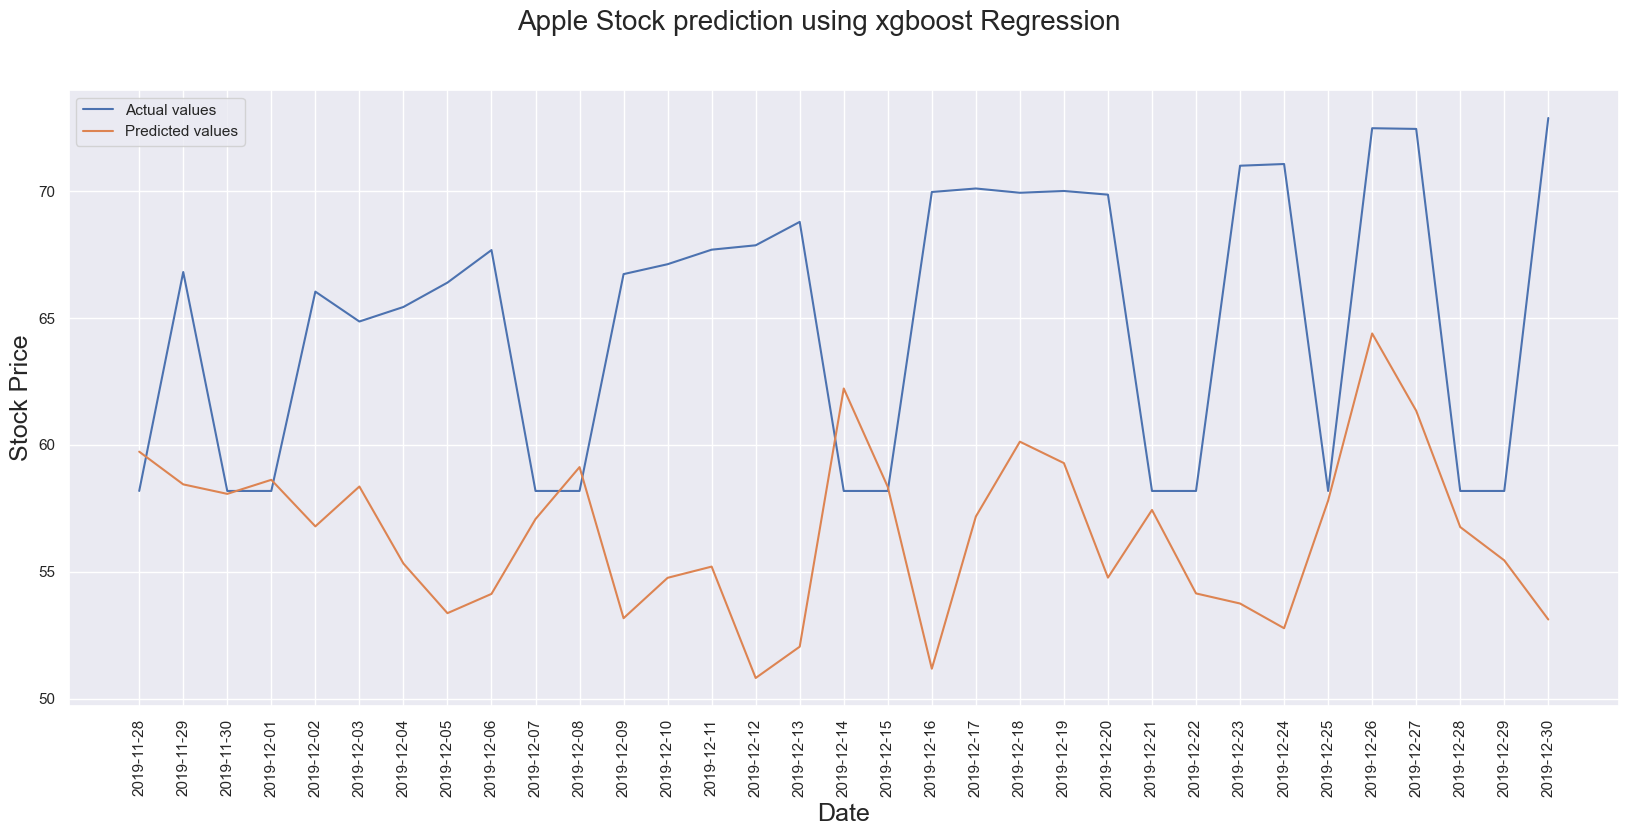

In [33]:
plt.figure(figsize=(20, 8))
plt.plot(tesla['Date'].tail(33), y_test, label = "Actual values")
plt.plot(tesla['Date'].tail(33), predict, label = "Predicted values")
plt.suptitle('Apple Stock prediction using xgboost Regression', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Stock Price', fontsize=18)
plt.xticks(rotation = 90)
plt.legend()
plt.show()

Using XGBRegressor to predict Google stock prices

In [34]:
google_x = google.iloc[:, 1:5].values
google_y = google.iloc[:, 5].values

x_train, x_test, y_train, y_test = train_test_split(google_x, google_y, test_size=0.180,  shuffle= False)

pipeline = make_pipeline(StandardScaler(), XGBRegressor(alpha=1.0))
pipeline.fit(x_train, y_train)

predict = pipeline.predict(x_test)

In [35]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {pipeline.score(x_train, y_train) * 100:.2f}% and Test Score : {pipeline.score(x_test, y_test) * 100:.2f}% using xgboost Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 2.9043
Mean Squared Error: 14.9644
Root Mean Squared Error: 3.8684
(R^2) Score: -1.2056
Train Score : 97.92% and Test Score : -120.56% using xgboost Regressor.
Accuracy: 95.66 %.


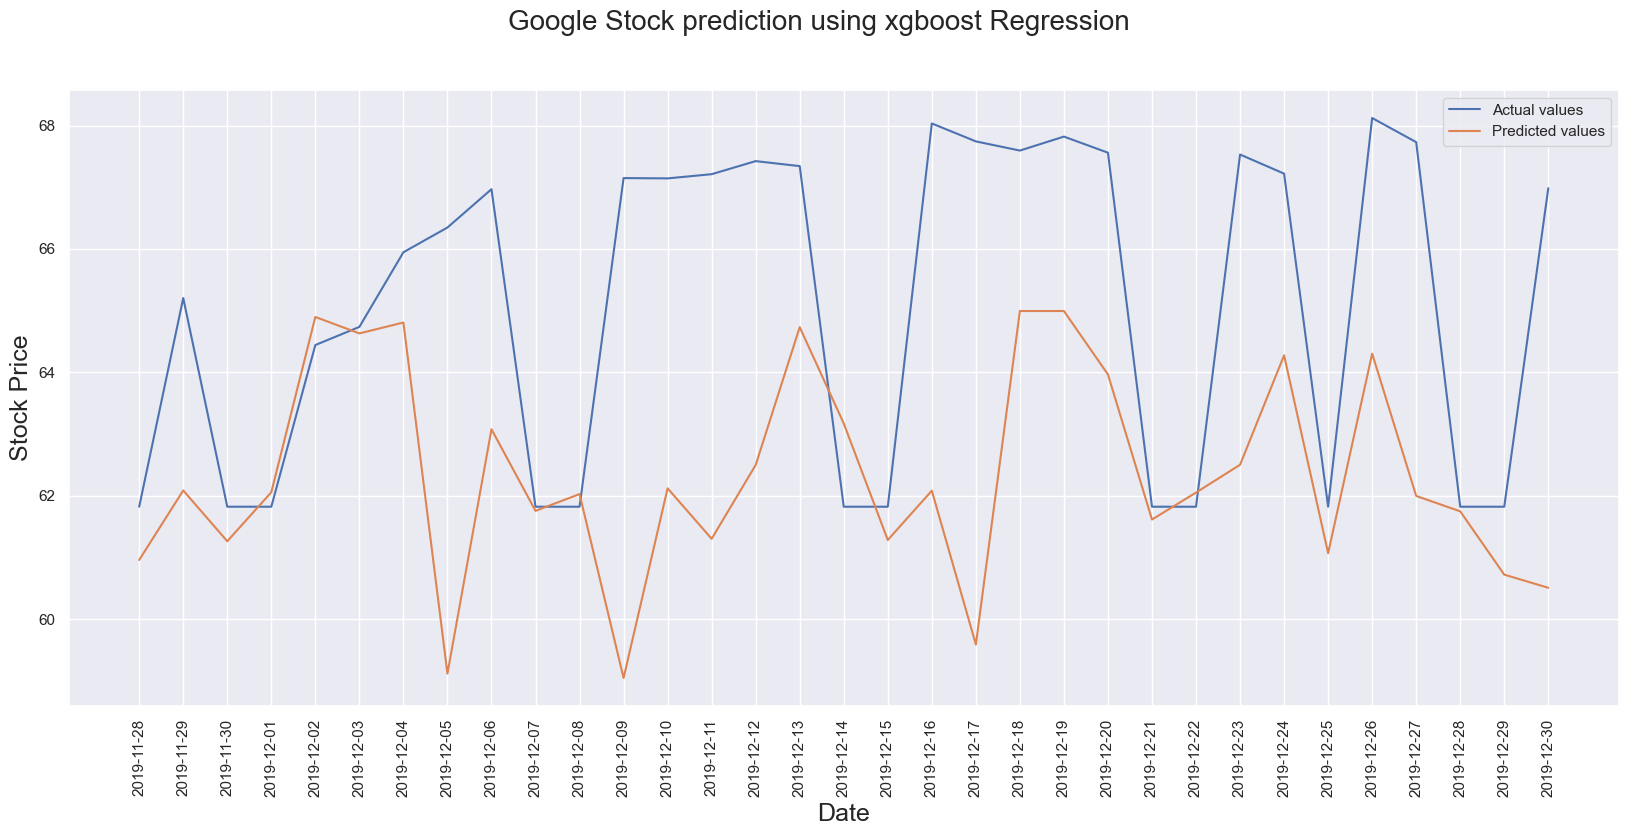

In [36]:
plt.figure(figsize=(20, 8))
plt.plot(tesla['Date'].tail(33), y_test, label = "Actual values")
plt.plot(tesla['Date'].tail(33), predict, label = "Predicted values")
plt.suptitle('Google Stock prediction using xgboost Regression', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Stock Price', fontsize=18)
plt.xticks(rotation = 90)
plt.legend()
plt.show()

Using XGBRegressor to predict Microsoft stock prices

In [37]:
microsoft_x = microsoft.iloc[:, 1:5].values
microsoft_y = microsoft.iloc[:, 5].values

x_train, x_test, y_train, y_test = train_test_split(microsoft_x, microsoft_y, test_size=0.180,  shuffle= False)

pipeline = make_pipeline(StandardScaler(), XGBRegressor(alpha=1.0))
pipeline.fit(x_train, y_train)

predict = pipeline.predict(x_test)

In [38]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {pipeline.score(x_train, y_train) * 100:.2f}% and Test Score : {pipeline.score(x_test, y_test) * 100:.2f}% using Linear Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 9.1249
Mean Squared Error: 129.8847
Root Mean Squared Error: 11.3967
(R^2) Score: -2.3747
Train Score : 99.25% and Test Score : -237.47% using Linear Regressor.
Accuracy: 94.06 %.


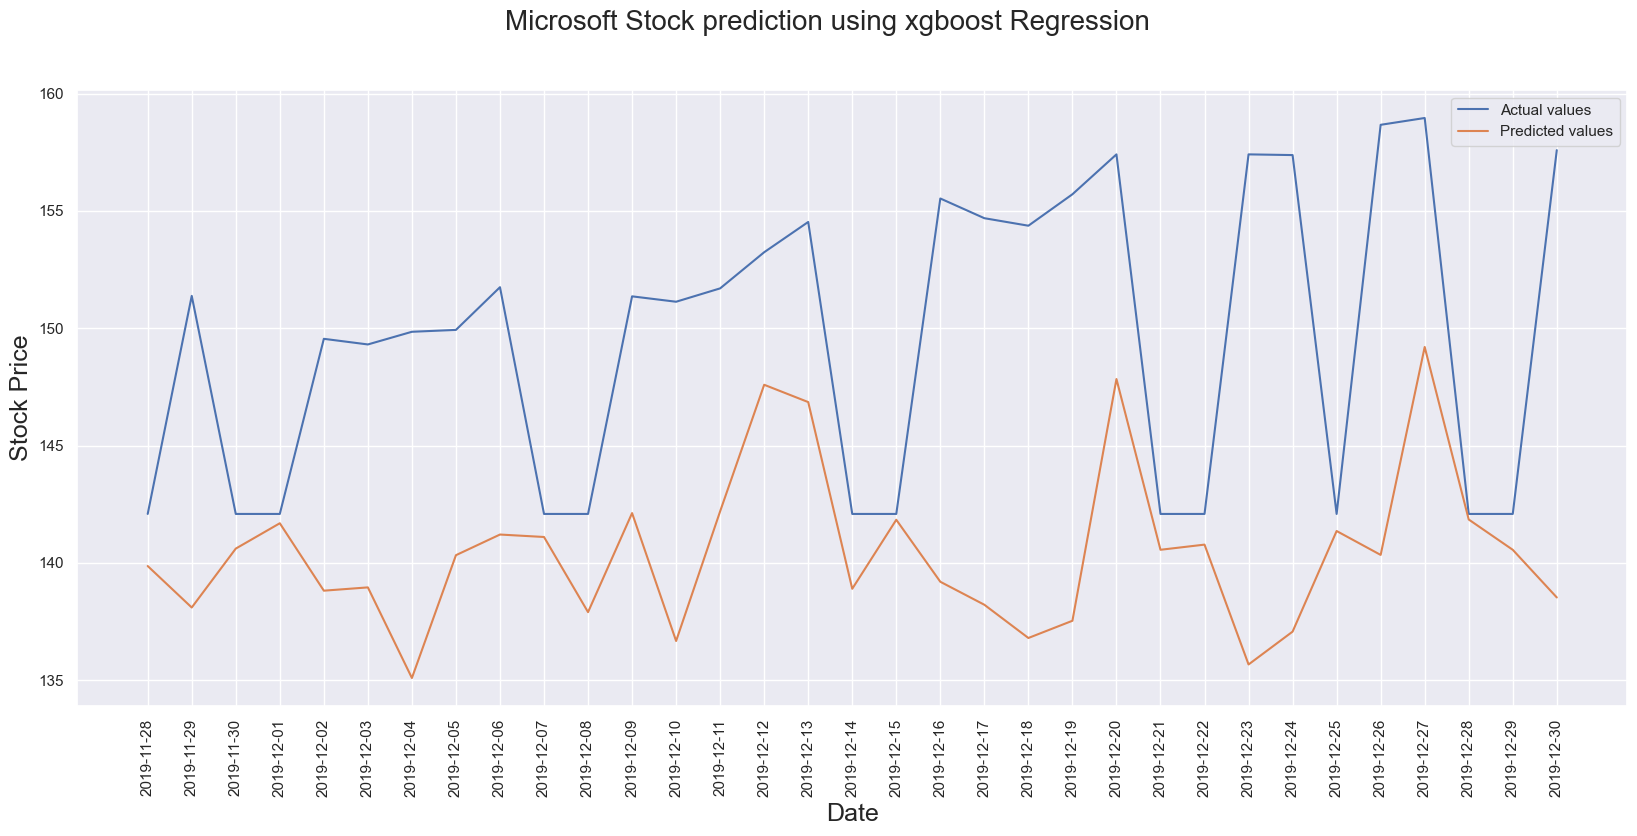

In [39]:
plt.figure(figsize=(20, 8))
plt.plot(tesla['Date'].tail(33), y_test, label = "Actual values")
plt.plot(tesla['Date'].tail(33), predict, label = "Predicted values")
plt.suptitle('Microsoft Stock prediction using xgboost Regression', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Stock Price', fontsize=18)
plt.xticks(rotation = 90)
plt.legend()
plt.show()